# Notebook
This notebook can be run on Google Colab without any setup!
<br>
<br>

# Overview

`equation_scraper` is a Python package that scrapes Wikipedia pages for mathematical equations and then parses the equations into its components to build prior distributions. Specifically, these priors include information such as the number of times an operator or function appears across all equations scraped. For example, the expression `m*x+b*sin(y)` would be parsed into the simple prior: `{*: 2, +: 1, sin: 1}`. The package includes much more information than this simple prior, for example conditional priors---a full breakdown of the included metrics is detailed on the `Priors` section of our documentation. The package was designed to provide equation discovery modelling techniques, such as Symbolic Regression and the Bayesian Machine Scientist, with informed priors; however, the application of this package can extend far beyond this.

## Functions

### Defined

The `equation-scraper` has a main function, `scrape_and_parse_equations()`, that sequentially runs two sub-functions, `scrape_equations()` and `parse_equations()`. The two sub-functions 1) scrapes equations from Wikipedia---`scrape_equations()`, and 2) parses the equations and builds the priors---`parse_equations()`. If running the sub-functions directly, they must be run sequentially because `parse_equations()` uses files produced from `scrape_equations()`.

### Keywords

All three of these functions take the same input: a list of keywords to search for. For example, `['Cognitive_psychology', 'Cognitive_science', 'Neuroscience']`, where the keywords are the Wikipedia topics you want scraped and parsed. These keywords must be Wikipedia [category pages](https://en.wikipedia.org/wiki/Help:Category). Further, the keywords you provide must be the end of the URL of the category you are looking to scrape (capitalization matters), i.e., everything following Wikipedia's `Category:` tag, such as https://<wbr>en.wikipedia.org/wiki/Category:**Cognitive_psychology**.

### Keyword Tags

You can use keyword tags to change the behaviour of the scraping function. Without using a tag---e.g., `Cognitive_psychology`--- the scraper will search for equations from all of the links from the corresponding wikipedia category page. Using the `Super:` tag---e.g.,
`Super:Cognitive_psychology`--- scrapes with a depth of two meaning that it will search all links within the corresponding category page, links within these links, and finally, links within these sublinks. For example, the first path of the `Cognitive_psychology` domain would be [Cognitive Psychology](https://en.wikipedia.org/wiki/Category:Cognitive_psychology) $\rightarrow$ [Cognitive Psychologists](https://en.wikipedia.org/wiki/Category:Cognitive_psychologists) $\rightarrow$ [American Cognitive Psychologists](https://en.wikipedia.org/wiki/Category:American_cognitive_psychologists). It then extracts equations from all levels of these links for parsing.
<br>
<br>
The final tag, `Direct:`, will search whichever URL you provide it, for example `Direct:https://en.wikipedia.org/wiki/Cognitive_psychology`, and does not assume a Wikipedia page. At this time, it only searches the first links in the same way as when not using a tag. The direct links do not need to be Wikipedia pages but the parsing was built around Wikipedia and direct links outside of Wikipedia has yet to be thoroughly tested.
<br>
<br>
You can mix these tags in your keywords, for example: `scrape_and_parse_equations(['Cognitive_psychology', 'Super:Cognitive_science', 'Direct:https://en.wikipedia.org/wiki/Neuroscience'])`

# Application

## The Main Function

Let's begin with the main function that scrapes Wikipedia, parses the equations, and derives priors all at once. First, we will install the package using pip and then use the `scrape_and_parse_equations()` function to scrape a category page using the `Super` tag.


In [1]:
%%capture
#Install the equation-scraper
!pip install equation-scraper

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


**********************

Scraping equations...
Creating a 'data' directory to hold the results in your current directory: /content
Searching for keyword(s): ['Super:Cognitive_psychology']



100%|██████████| 433/433 [01:28<00:00,  4.92it/s]


Web Scraping Complete in 88.09 seconds!
Scraping complete...

**********************
**********************

Parsing equations...
Searching for keyword(s): ['Super:Cognitive_Psychology']



100%|██████████| 275/275 [00:08<00:00, 32.52it/s]


Parsed: 73 ... Skipped: 198 ... Unparsed: 3
Parsing complete...

**********************
**********************


Plotting priors...
Searching for keyword(s): ['Super:Cognitive_Psychology']

Plotting complete...

**********************


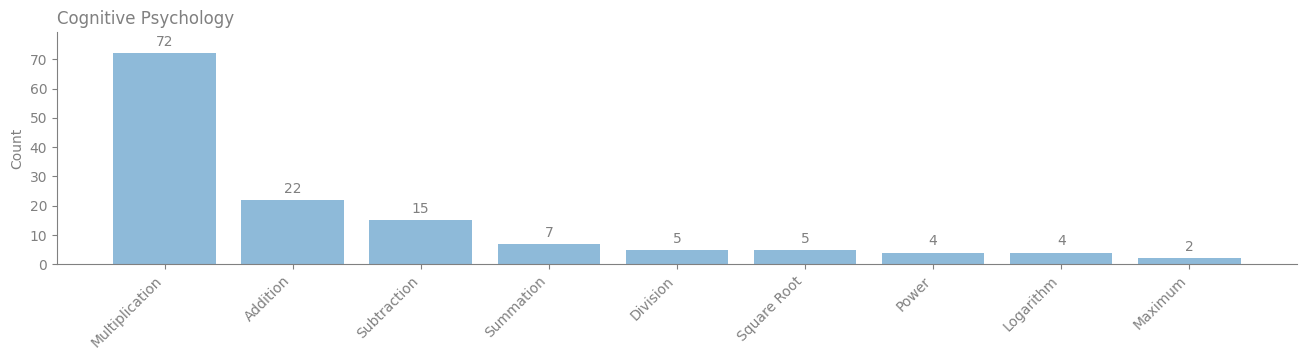

In [2]:
#Import the equation-scraper
from equation_scraper import scrape_and_parse_equations

scrape_and_parse_equations(['Super:Cognitive_psychology'])

All data produced will be stored in a `data` folder at your current working directory. If this folder does not exists, the package will create it for you. Each search is further organized by creating its own specific sub-folder named after your keywords, separated by underscores. For example `[Super:Cognitive_psychology, Neuroscience]` would create the folder `SUPERCognitivePsychology_Neuroscience` within the `data` folder. Note, keywords using the `Direct:` tag are not included in this filename nomenclature.

If you repeat the exact same search, this folder is first deleted and then rebuilt with the new search. After running this function, you will notice a series of files, as well as a `debug` folder with more files, but we will explain what each file does in the next section of the tutorial when running each of the two sub-functions individually.

An example structure when using the keywords `['Cognitive_psychology']` would be:
```
data
|
└───CognitivePsychology
    │   equations_CognitivePsychology.txt
    │   priors_CognitivePsychology.pkl
    |   parsed_equations_CognitivePsychology.txt
    |   (optional) figure_CognitivePsychology.png
    |
    └───debug
        │   debug_parsed_CognitivePsychology.txt
        │   skipped_equations_CognitivePsychology.txt
        │   wordsRemoved_equations_CognitivePsychology.txt
```

## The Sub-Functions

### Scrape Equations

The `scrape_equations()` function searches Wikipedia and derives a list of equations to be parsed.

In [3]:
#!pip install equation-scraper #Uncomment this to install the equation-scraper if you didn't do so above

from equation_scraper import scrape_equations

scrape_equations(['Super:Cognitive_psychology', 'Neuroscience'])

Searching for keyword(s): ['Super:Cognitive_psychology', 'Neuroscience']



100%|██████████| 595/595 [01:50<00:00,  5.41it/s]

Web Scraping Complete in 110.01 seconds!


This function produces a single file: `equations_*.txt` where `*` corresponds to the keywords you searched for (i.e., the name of the search's sub-folder), for example: `equations_SUPERCognitivePsychology_Neuroscience.txt` in the case of the example code above. The first line of this file lists meta-data of the keywords used for the search (e.g., `#CATEGORIES: ['Super:Cognitive_Psychology', 'Neuroscience]`). After this, you will see a pattern of each Wikipedia page scraped that looks like this:

<br>
<hr>


`#ROOT: Biological Motion Perception` <br>
`#LINK: /wiki/`<wbr>`Biological_motion_perception`<br>
`{\displaystyle \nu _{\psi }(t)={\frac {R_{\psi }(t)-{\bar {R}}}{\bar {R}}}}`<br>
`{\displaystyle o_{l}(x)={\sqrt {max(g_{p}(x_{i}))max(g_{r}(x_{j}))}}}`

<hr>
<br>


- `#ROOT` is the title of the corresponding Wikipedia page
- `#LINK` is the Wikipedia URL without the  `https://en.wikipedia.org` prefix
 - e.g., `/wiki/`<wbr>`Biological_motion_perception` can be used as `https://en.wikipedia.org/wiki/Biological_motion_perception`
- Everything after this is a scraped equation. The format of these equations has not been modified in any way up to this point, so these are exactly as they were scraped from Wikipedia. For example, from the above example, the equations are:
 - `{\displaystyle \nu _{\psi }(t)={\frac {R_{\psi }(t)-{\bar {R}}}{\bar {R}}}}`
 - `{\displaystyle o_{l}(x)={\sqrt {max(g_{p}(x_{i}))max(g_{r}(x_{j}))}}}`


### Parse Equations

The `parse_equations()` function then loads the `equations_*.txt` file written from the previous function and iterates through the equations where it parses their operators and functions and builds priors. Running this function still requires that you pass the same keywords as with the previous function because it uses these to determine which folder the data is saved into.

In [4]:
#!pip install equation-scraper #Uncomment this to install the equation-scraper if you didn't do so above

from equation_scraper import parse_equations

parse_equations(['Super:Cognitive_psychology', 'Neuroscience'])

Searching for keyword(s): ['Super:Cognitive_Psychology', 'Neuroscience']



100%|██████████| 1270/1270 [00:21<00:00, 58.25it/s]


Parsed: 366 ... Skipped: 886 ... Unparsed: 17


The main file produced by this function is the `priors_*.pkl` file where `*` corresponds to the keywords you searched for (i.e., the name of the search's sub-folder), for example: `priors_SUPERCognitivePsychology_Neuroscience.pkl`. We look into this file in detail in the `Priors` section of our documentation. The other file that this function produces is the `parsed_equations_*.txt` file, which includes the parsing results per equation.

Additionally, there are three files within the debug folder: `debug_parsed_*.txt`, `skipped_equations_*.txt`, `wordsRemoved_equations_*.txt`.


- `debug_parsed_*.txt` presents the same information as `parsed_equations_*.txt` but with a different organization structure.

- `skipped_equations_*.txt` presents all equations discarded and not used for priors (these are most often discarded because they are not actual expressions, such as with a variable decleration in text, e.g., "$v_1$ *is our first indepenent variable*").

- `wordsRemoved_equations_*.txt` is a list of words that were turned into variables---this occurs when equations contain words to represent a single variable, for example: `WEIGHT = HEIGHT * c` would be transformed to `y = x * c` and the words `WEIGHT` and `HEIGHT` would be added to this list.

## Other Functions
### Plot Prior
The `plot_prior()` function will produce a figure---`figure_*.png`--- that is a barplot of the frequencies of operators/functions. It uses the same keywords as the aforementioned functions. The `scrape_and_parse_equations()` function also automatically runs this function after it has scraped and parsed the equations from your keywords list.

Searching for keyword(s): ['Super:Cognitive_Psychology', 'Neuroscience']



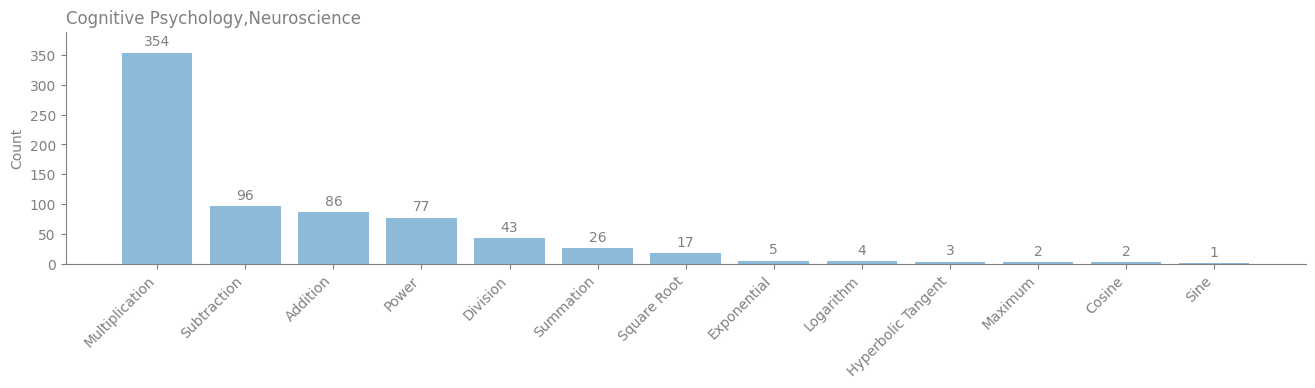

In [5]:
#!pip install equation-scraper #Uncomment this to install the equation-scraper if you didn't do so above

from equation_scraper import plot_prior

plot_prior(['Super:Cognitive_psychology', 'Neuroscience'])

### Load Prior
The `load_prior()` function will allow you to load the pickle file containing the prior information either using the same keywords as all aforementioned functions:<br>
`es_priors = load_prior(['Super:Cognitive_psychology', 'Neuroscience'])`
<br><br>
or with a point-and-click interface if no inputs are given to the function: <br>
`es_priors = load_prior()`
<br><br>
This is the only function that returns a variable, and this variable will contain metadata and the priors.

In [7]:
#!pip install equation-scraper #Uncomment this to install the equation-scraper if you didn't do so above

from equation_scraper import load_prior

es_priors = load_prior(['Super:Cognitive_psychology', 'Neuroscience'])

#Print prior information
print('**********METADATA**********\n')
for key in es_priors['metadata'].keys():
    print(f"{key}: {es_priors['metadata'][key]}")

print('\n***********PRIORS***********\n')
for key in es_priors['priors'].keys():
    print(f"{key}: {es_priors['priors'][key]}")

**********METADATA**********

number_of_equations: 367
unparsed_equations: 17
list_of_operators: ['+', '*', '-', '/', '^', '**']
list_of_functions: ['**2', '**3', 'sin', 'cos', 'tan', 'asin', 'acos', 'atan', 'sinh', 'cosh', 'tanh', 'sqrt', 'sum', 'abs', 'exp', 'max', 'min', 'log', 'relu', '**2', '**3', 'Sin', 'Cos', 'Tan', 'Asin', 'Acos', 'Atan', 'Sinh', 'Cosh', 'Tanh', 'Sqrt', 'Sum', 'Abs', 'Exp', 'Max', 'Min', 'Log', 'Relu', '**2', '**3', 'SIN', 'COS', 'TAN', 'ASIN', 'ACOS', 'ATAN', 'SINH', 'COSH', 'TANH', 'SQRT', 'SUM', 'ABS', 'EXP', 'MAX', 'MIN', 'LOG', 'RELU', '**2', '**3', 'SIN', 'COS', 'TAN', 'ASIN', 'ACOS', 'ATAN', 'SINH', 'COSH', 'TANH', 'SQRT', 'SUM', 'ABS', 'EXP', 'MAX', 'MIN', 'LOG', 'RELU']
list_of_constants: ['Alpha', 'Beta', 'Gamma', 'Delta', 'Epsilon', 'Varepsilon', 'Zeta', 'Eta', 'Theta', 'Vartheta', 'Iota', 'Kappa', 'Varkappa', 'Lambda', 'Mu', 'Nu', 'Xi', 'Omicron', 'Pi', 'Varpi', 'Rho', 'Varrho', 'Sigma', 'Varsigma', 'Tau', 'Upsilon', 'Phi', 'Varphi', 'Chi', 'Psi', '

# Priors

The priors pickle file, `priors_*.pkl` is loaded as a dictionary with two sub-dictionaries, `metadata` and `priors`. The priors that are stored in the `priors` sub-dictionary are built using the [`equation-tree package`](https://pypi.org/project/equation-tree/0.0.1/). We will give brief definitions of the information stored in this sub-dictionary, but for a detailed look see the `equation-tree` package documentation. It is important to note that the `equation-tree` package uses binary expression trees where operators (e.g., `+`) have two inputs and functions  (e.g., `sin`) have one input. For example, the expression `m*x+b*sin(y)` could be represented as:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`+`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;\ <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`*`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`*` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;\ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;/&nbsp;&nbsp;\ <br>
&nbsp;`m`&nbsp;&nbsp;&nbsp;&nbsp;`x`&nbsp;&nbsp;&nbsp;&nbsp;`b`&nbsp;&nbsp;`sin`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`y`<br>

<hr>

The full structure of the pickle file looks like this:

`es_priors ` <br>
`│`  <br>
`└───metadata` <br>
`│   │   number_of_equations: ` *The number of parsed equations* <br>
`│   │   unparsed_equations:` *The number of equations that failed to parse* <br>
`│   │   list_of_operators: ` *The list of operators considered when parsing equations and building piors* <br>
`│   │   list_of_functions:` *The list of functions considered when parsing equations and building piors* <br>
`│   │   list_of_constants:` *The list of words/symbols representing constants when parsing equations and building piors* <br>
`│   │   list_of_equations:` *The list of each parsed equation* <br>
`│   `  <br>
`└───priors` <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   max_depth:` *The frequency of number of nodes (operators, functions, constants, & variables) in the expression tree* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   depth: ` *The frequency of node layers in the expression tree* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   structures:` *The list of expression tree structures across equations* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   features:   ` *The number of constants and variables across equations* * <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   functions:` *Frequency count of each function across equations* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   operators: ` *Frequency count of each operator across equations* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   operator_and_functions:` *Frequency count of each function and operator across equations* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   function_conditionals:` *Frequency count of conditional functions across equations* <br>
&nbsp;&nbsp;&nbsp;&nbsp;`    │   operator_conditionals:` *Frequency count of conditional operators across equations* <br>

\**Note that the constant and variable counts are difficult to extract when scraping Wikipedia and so these values are likely incorrect - use with caution*

# Conclusion

Altogether, `equation-scraper` retrieves equations from Wikipedia, parses them, and builds priors of the operators and functions. It does so by either using the main `scrape_and_parse_equations()` function or by running the sub-functions `scrape_equations()` and `parse_equations()` sequentially. All functions accept a list of keywords to be searched, `['Cognitive_psychology', 'Neuroscience']` that represent the Wikipedia category page(s) to be scraped. The functionality of the scraper can also be modified using the `Super:` or `Direct:` keyword tags.
<br>
<br>
<hr>
<br>
We are always open to feedback and new contributors to make the package better for everyone!